In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV

from sklearn.metrics import f1_score, classification_report


In [2]:
data= pd.read_csv('hotel_bookings.csv', usecols= ['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests'])
data= data[:5000]
data

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4996,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4997,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4998,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        5000 non-null   object 
 1   is_canceled                  5000 non-null   int64  
 2   adults                       5000 non-null   int64  
 3   children                     5000 non-null   float64
 4   babies                       5000 non-null   int64  
 5   meal                         5000 non-null   object 
 6   country                      4998 non-null   object 
 7   market_segment               5000 non-null   object 
 8   distribution_channel         5000 non-null   object 
 9   reserved_room_type           5000 non-null   object 
 10  booking_changes              5000 non-null   int64  
 11  deposit_type                 5000 non-null   object 
 12  days_in_waiting_list         5000 non-null   int64  
 13  customer_type     

In [4]:
data.isna().sum()

hotel                          0
is_canceled                    0
adults                         0
children                       0
babies                         0
meal                           0
country                        2
market_segment                 0
distribution_channel           0
reserved_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

Terdapat missing data di column country sebanyak 2

# EDA

- Target= 'is_canceled'
- Customer profiling= 'adults','children','babies','country'
- Customer behavior= 'meal','market_segment','distribution_channel','reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests'

## Target

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

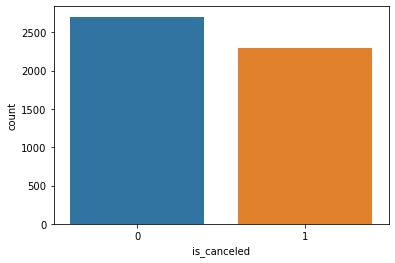

In [5]:
sns.countplot(data['is_canceled'])

In [6]:
data['is_canceled'].value_counts()/data.shape[0]*100

0    54.04
1    45.96
Name: is_canceled, dtype: float64

tidak terindikasi adanya data imbalance

## Customer profiling

In [7]:
data['country'].value_counts().head(10)

PRT    3174
ESP     550
GBR     505
IRL     172
FRA     113
DEU      89
NLD      55
CN       33
BEL      29
USA      28
Name: country, dtype: int64

In [8]:
country= data['country'].value_counts()/len(data)*100
country.head(10)

PRT    63.48
ESP    11.00
GBR    10.10
IRL     3.44
FRA     2.26
DEU     1.78
NLD     1.10
CN      0.66
BEL     0.58
USA     0.56
Name: country, dtype: float64

Kebanyakan customer hotel ini merupakan orang yang berasal dari Portugal

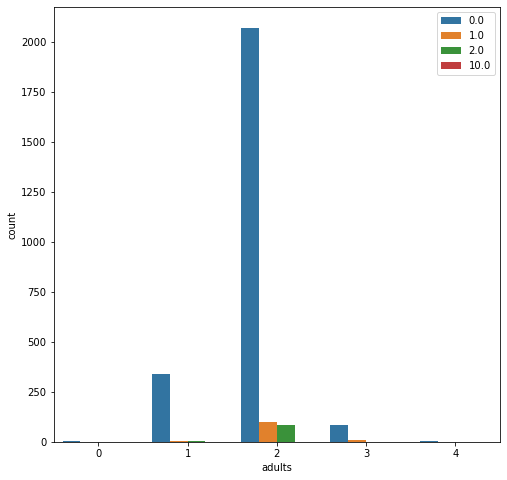

In [9]:
plt.figure(figsize=(8,8))
sns.countplot(data[data['is_canceled']==0]['adults'], hue= data['children'])
plt.legend(loc='upper right')

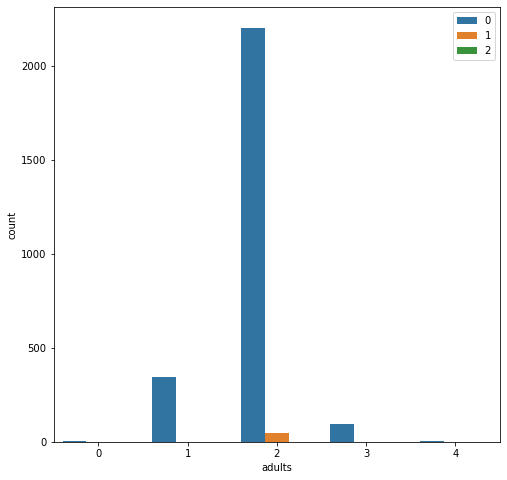

In [10]:
plt.figure(figsize=(8,8))
sns.countplot(data[data['is_canceled']==0]['adults'], hue= data['babies'])
plt.legend(loc='upper right')

Kebanyakan yang datang ke hotel ini adalah 2 orang dewasa tanpa membawa anak-anak maupun bayi

**Kesimpulan:**
- Berdasarkan plot diatas, kebanyak customer dari Hotel ini berasal dari 
>* Portugal (PRT) -> Sangat Dominan (63.48%)
>* Spanyol (ESP) -> Setara dengan GBR (11%)
>* United Kingdom (GBR) -> 10%
- Kebanyakan customer datang ke hotel berpasangan atau 2 orang. namun hanya sedikit yang membawa anak dan bayi

## Customer Behavior

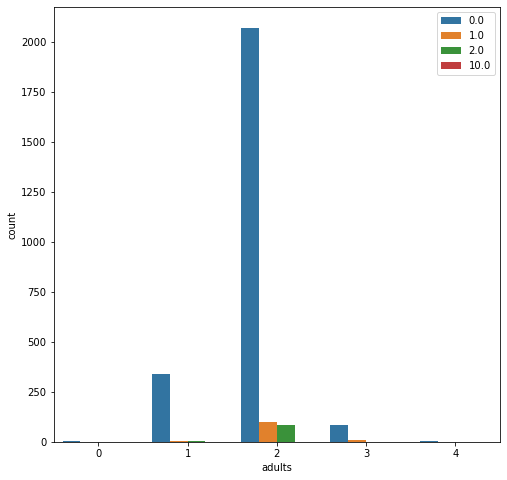

In [11]:
plt.figure(figsize=(8,8))
sns.countplot(data[data['is_canceled']==0]['adults'], hue= data['children'])
plt.legend(loc='upper right')

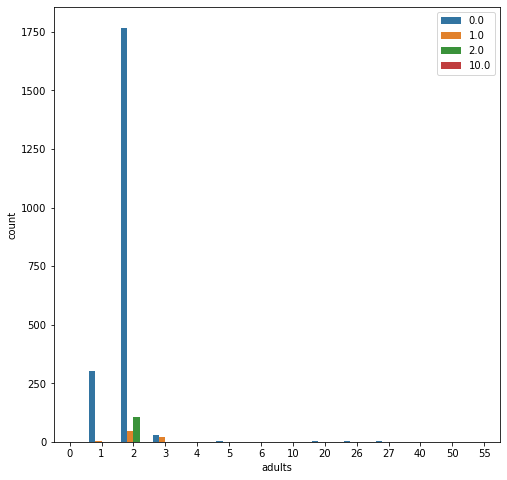

In [12]:
plt.figure(figsize=(8,8))
sns.countplot(data[data['is_canceled']==1]['adults'], hue= data['children'])
plt.legend(loc='upper right')

terlihat bahwa adults lebih dari 4 akan cancel (kemungkinan terjadi adanya kesalahan input atau error, atau sistem secara otomatis cancel ?)

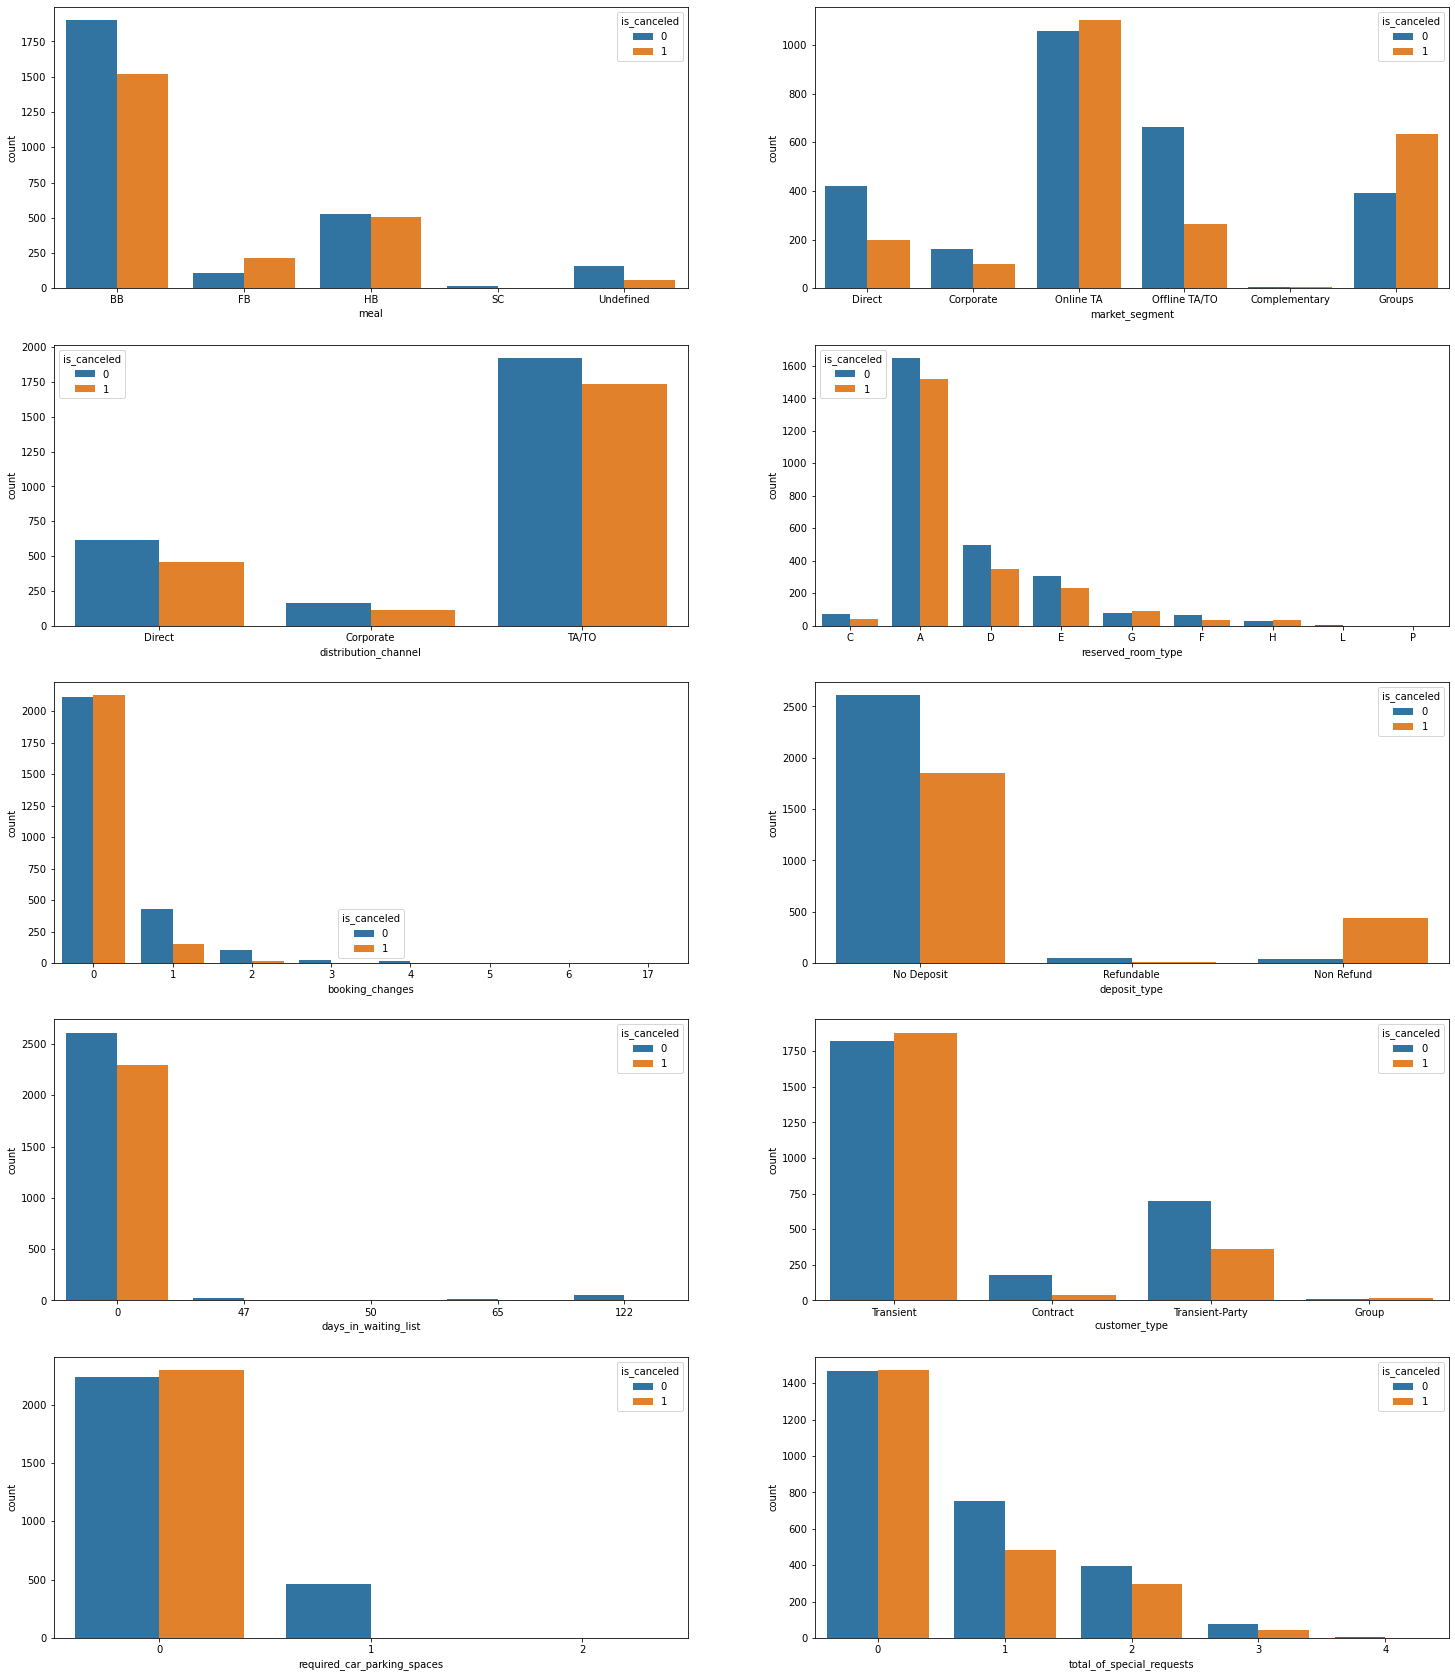

In [13]:
cust_beh= ['meal','market_segment','distribution_channel','reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']
fig, axes= plt.subplots(5,2, figsize=(25,30))
for cb, ax in zip(cust_beh, axes.flatten()):
    sns.countplot(cb, data= data, hue= 'is_canceled', ax=ax)

<AxesSubplot:xlabel='market_segment', ylabel='count'>

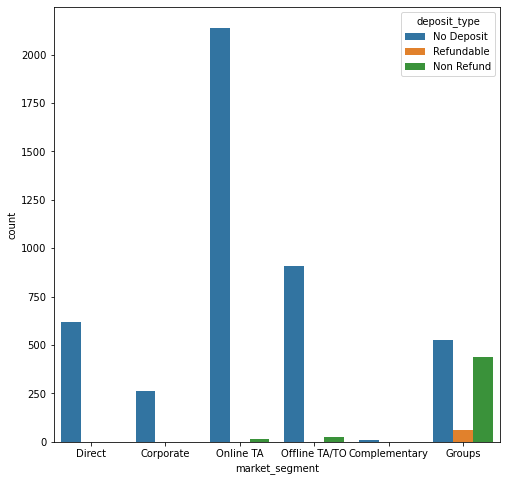

In [14]:
plt.figure(figsize=(8,8))
sns.countplot(data['market_segment'], hue= data['deposit_type'] )

<AxesSubplot:xlabel='market_segment', ylabel='count'>

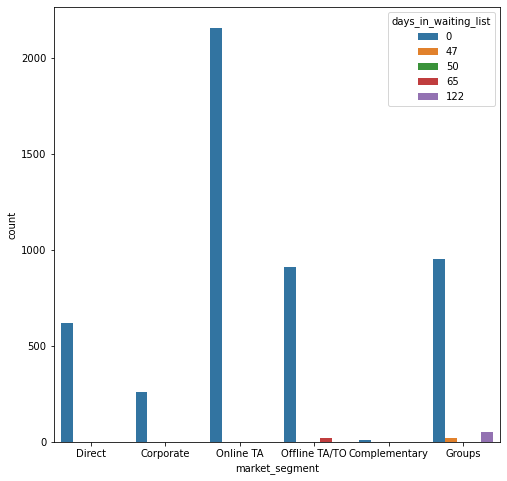

In [15]:
plt.figure(figsize=(8,8))
sns.countplot(data['market_segment'], hue= data['days_in_waiting_list'] )

<AxesSubplot:xlabel='total_of_special_requests', ylabel='count'>

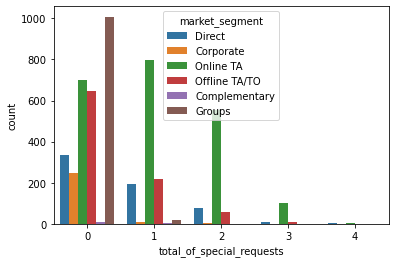

In [16]:
sns.countplot(data['total_of_special_requests'], hue= data['market_segment'] )

<AxesSubplot:xlabel='deposit_type', ylabel='count'>

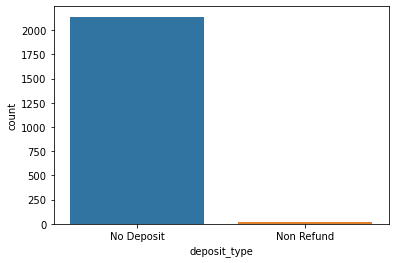

In [17]:
sns.countplot(data[data['market_segment']== 'Online TA']['deposit_type'])

- BB: Bed & Breakfast
- HB: Half Board (Breakfast and Dinner normally)
- FB: Full Board (Breakfast, Lunch and Dinner)
- SC/Undefined: No Meal 

**Kesimpulan:**
* Meal:
>- Kebanyakan customer hanya mengambil meal untuk Breakfast saja.
>- Customer yang memilih Full Board kebanyakan cancel (antara makanan kurang enak, harga tidak sesuai, atau salah pilih ?)

* market_segment:
>- Mayoritas customer memesan menggunakan Online Travel Agent dan terbanyak juga dalam jumlah cancel(karena kemungkinan kalau menggunakan Online Travel Agent lebih mudah untuk cancel)
>- Sering terjadi cancel di bookingan Group
>- Jarang terjadi cancel di Offline TA/TO, mungkin karena proses lebih rumit ?

* distribution_channel:
>- persentase cancel antar channel tidak berbeda signifikan
>- mayoritas booking dari TA/TO

* reserved_room_type:
>- persentase cancel antar room type tidak berbeda signifikan
>- room type A paling banyak di booking

* booking_changes:
>- semakin banyak perubahan, persentase cancel semakin rendah
>- mayoritas booking tidak ada perubahan

* deposit_type:
>- persentase cancel no refund paling besar(berhubungan dengan market_segment, karena kebanyakan yang booking no refund adalah segment Groups dimana segment Groups sering melakukan cancel), sedangkan yang bisa refund persentase terjadi cancel lebih kecil. (sedikit aneh)
>- mayoritas booking tanpa deposit, dan jumlah cancel nya terbanyak

* days_in_waiting_list:
>- semakin lama semakin sedikit cancel nya
>- orderan dengan waiting list biasanya memiliki market segment Groups atau Offline TA/TO

* customer_type:
>- customer type transient merupakan mayoritas booking dan memiliki cancel tertinggi

* required_car_parking_spaces:
>- Kebanyakan customer tidak membawa mobil. dan biasanya jika sudah request parking space jarang cancel

* total_of_special_request:
>- orderan dari Online TA paling banyak meminta special request (kemungkinan karena disediakan di aplikasi)


**Insight:**
- di bagian meal, Full board memiliki persentase cancel yang tinggi kemungkinan diakibatkan review makanan kurang enak, harga tidak sesuai, atau terjadi kesalahan pilih. Hotel dapat meningkatkan kualitas makanan dan variasi makanan, adjust harga atau menjelaskan pilihan meal dengan lebih baik.

- karena mayoritas cancel berada di segment Online TA, dan kebanyakan deposit type Online TA adalah No Deposit. jika hotel ingin menekan cancel, maka hotel dapat mengubah deposit type di segment Online TA menjadi no refund untuk mengurangi cancel. tapi ada kemungkinan revenue turun karena customer tidak mau book jika no refund.

- Bookingan segment Groups sering cancel. Langkah yang dapat dilakukan hotel mungkin memberi promo terhadap segment Groups

- Karena mayoritas customer berasal dari negara Portugal (mungkin karena posisi hotel berada di Portugal), Hotel bisa membuat promosi untuk meningkatkan turis dari luar negeri. Dengan memberikan diskon, voucher, dll

- Karena mayoritas customer tidak membawa mobil(dan terjadi banyak cancel karena tidak request parkir), Hotel dapat menambah usaha sewa kendaraan karena bisa jadi lokasi hotel kurang strategis yang menyebabkan cancel karena susahnya transportasi.


# Predict

In [18]:
data= pd.read_csv('hotel_bookings.csv', usecols= ['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests'])
data= data[:5000]
data

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4996,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4997,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4998,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0


In [19]:
data.nunique()

hotel                           1
is_canceled                     2
adults                         14
children                        4
babies                          3
meal                            5
country                        56
market_segment                  6
distribution_channel            3
reserved_room_type              9
booking_changes                 8
deposit_type                    3
days_in_waiting_list            5
customer_type                   4
required_car_parking_spaces     3
total_of_special_requests       5
dtype: int64

## Preprocessing & Data Cleaning

* Preprocess Scheme:
>- impute country w/ mode (karena merupakan category, input menggunakan mode)
>- karena 'hotel' hanya 1 jenis, maka akan di drop untuk meringankan model

karena kebanyakan data merupakan categorical variable(di buktikan dengan nunique yang sedikit dibandingkan jumlah 5000 row), maka untuk categorical di preprocess dengan one hot (untuk unique yang sedikit) dan binary(untuk unique yang banyak karena jika menggunakan one hot akan menghasilkan kolom yang banyak), tujuan dari one hot dan binary adalah convert categorical menjadi numerical form.

>- One Hot= 'meal','market_segment', 'distribution_channel', 'deposit_type', 'customer_type'
>- Binary= 'country', 'reserved_room_type'


In [20]:
data.drop('hotel', axis= 1,inplace= True)

In [21]:
binary_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('binary', ce.BinaryEncoder())
])

In [22]:
transformer= ColumnTransformer([
    ('one hot', OneHotEncoder(drop= 'first'), ['meal','market_segment', 'distribution_channel', 'deposit_type', 'customer_type']),
    ('binary', binary_pipe, ['country', 'reserved_room_type'])
],remainder= 'passthrough')

In [23]:
transformer.fit_transform(data)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [24]:
X= data.drop(['is_canceled'], axis= 1)
y= data['is_canceled']

In [25]:
X.shape, y.shape

((5000, 14), (5000,))

* 0: ga cancel
* 1: cancel

TN: Diprediksi ga cancel, kenyataannya ga cancel
TP: Diprediksi cancel, kenyataannya cancel

FP: Diprediksi cancel, kenyataannya ga cancel
FN: Diprediksi ga cancel, kenyataannya cancel

karena di bisnis perhotelan, jika diprediksi tidak cancel ada konfirmasi kedatangan sebelum adanya tindakan lebih lanjut
* FP: hotel menganggap customer cancel dan menjual ruangan ke customer lain, customer pertama datang dan tidak bisa check in **(ada kerugian reputasi menurun karena review jelek dan harus membayar ganti rugi ke customer)**
* FN: hotel memastikan kedatangan customer, jadi hotel tidak rugi persiapan kedatangan customer. namun kemungkinan ruangan sulit untuk dijual kembali karena waktu, jadi tergantung waktu konfirmasi hotel ke customer **(ada kerugian karena sulit dijual kembali)**

Kedua kesalahan prediksi ini mengakibatkan kerugian finansial karena FP memungkinkan adanya ganti rugi dan tentunya reputasi yang akan menurun (kerugian finansial jangka panjang), sedangkan FN memungkinkan adanya kesulitan untuk menjual kamar cancel ke orang lain (tidak mendapat revenue). Perusahaan harus berusaha menekan kesalahan prediksi keduanya, jadi metric yang di gunakan untuk menekan hal tsb menggunakan f1.

Model yang digunakan:
- Logistic Regresi
>- Melakukan klasifikasi dengan membuat kurva berdasarkan data yang dipelajari

- K-Nearest Neighbors
>- Melakukan klasifikasi dengan melihat data k tetangga terdekat disekelilingnya (k merupakan jumlah tetangga terdekat) dan memprediksi berdasarkan mayoritas data
    
- Decision Tree
>- Melakukan klasifikasi dengan membuat struktur pohon, dan membuat true/false statement sesuai dengan karakteristik data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                   test_size = 0.25,
                                                   random_state = 2021)

In [27]:
#Model
logreg= LogisticRegression(solver= 'liblinear')
knn= KNeighborsClassifier()
tree= DecisionTreeClassifier(random_state= 2021)

#Transform
pipe_logreg= Pipeline([('transformer', transformer),('model',logreg)])
pipe_knn= Pipeline([('transformer', transformer),('model', knn)])
pipe_tree= Pipeline([('transformer', transformer),('model', tree)])

list_pipe= [pipe_logreg, pipe_knn, pipe_tree]

def model_evaluation(list_pipe, scoring):
    skfold= StratifiedKFold(n_splits=5)
    df= pd.DataFrame(columns= ['Model','1','2','3','4','5','mean cv','std cv'])
    for i in list_pipe:
        arr = cross_val_score(i, X_train, y_train, scoring= scoring,cv=skfold)
        df = df.append({'Model':str(i[-1]).split('(')[0], '1':arr[0], '2':arr[1], '3':arr[2], '4':arr[3], '5':arr[4], 'mean cv':arr.mean(),'std cv':arr.std()}, ignore_index=True)
    return df

def f1(list_pipe):
    df= pd.DataFrame(columns= ['Model','f1 score'])
    for i in list_pipe:
        i.fit(X_train, y_train)
        pred= i.predict(X_test)
        arr= f1_score(y_test, pred)
        df= df.append({'Model': str(i[-1]).split('(')[0], 'f1 score': arr}, ignore_index= True)
    return df

model_score= model_evaluation(list_pipe, 'f1')
f1_result= f1(list_pipe)

model_score= model_score.merge(f1_result)
model_score.sort_values('f1 score', ascending= False)

,Model,1,2,3,4,5,mean cv,std cv,f1 score
0,LogisticRegression,0.853755,0.835341,0.852673,0.847411,0.827225,0.843281,0.010352,0.859200
2,DecisionTreeClassifier,0.850350,0.854795,0.846473,0.859175,0.836763,0.849511,0.007665,0.858355
1,KNeighborsClassifier,0.833997,0.818182,0.826087,0.841530,0.821847,0.828329,0.008443,0.792517


dari hasil di atas, decision tree merupakan yang terbaik karena memiliki std yang lebih kecil (lebih stabil) meskipun f1 score nya lebih kecil sedikit. akan kita hyperparameter tuning untuk mengimprove model

In [28]:
estimator= Pipeline([
    ('transformer', transformer),
    ('model', tree)
])

hyperparam_space= {
    'model__criterion': ['gini', 'entropy'], #kriteria untuk menghitung informasi data
    'model__min_samples_split': [i for i in range(1,50,2)], #Nilai minimum sample untuk membagi jumlah node 
    'model__min_samples_leaf': [i for i in range(1,20)] #Nilai minimum sample yang dibutuhkan untuk berada di daun
}

grid= GridSearchCV(
    estimator,
    param_grid = hyperparam_space,
    cv = StratifiedKFold(n_splits = 5),
    scoring = 'f1',
    n_jobs = -1)

In [29]:
grid.fit(X_train, y_train)

print('best score', grid.best_score_)
print('best param', grid.best_params_)

best score 0.8556136693769073
best param {'model__criterion': 'entropy', 'model__min_samples_leaf': 16, 'model__min_samples_split': 39}


In [30]:
estimator2= Pipeline([
    ('transformer', transformer),
    ('model', logreg)
])

hyperparam_space2= {
    'model__C': [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

grid2= GridSearchCV(
    estimator2,
    param_grid = hyperparam_space2,
    cv = StratifiedKFold(n_splits = 5),
    scoring = 'f1',
    n_jobs = -1)

In [31]:
grid2.fit(X_train, y_train)

print('best score', grid2.best_score_)
print('best param', grid2.best_params_)

best score 0.8488586367221824
best param {'model__C': 5, 'model__solver': 'lbfgs'}


dari kedua model yang sudah di hyperparameter, yang terbaik tetap model Decision Tree

## Before VS After

In [32]:
pipe_tree.fit(X_train,y_train)
f1_score(y_test,pipe_tree.predict(X_test))

0.8583545377438506

In [33]:
print(classification_report(y_test,pipe_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       676
           1       0.84      0.88      0.86       574

    accuracy                           0.87      1250
   macro avg       0.87      0.87      0.87      1250
weighted avg       0.87      0.87      0.87      1250



In [34]:
grid.fit(X_train,y_train)
f1_score(y_test,grid.best_estimator_.predict(X_test))

0.8604651162790697

In [35]:
print(classification_report(y_test,grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       676
           1       0.82      0.90      0.86       574

    accuracy                           0.87      1250
   macro avg       0.87      0.87      0.87      1250
weighted avg       0.87      0.87      0.87      1250



ada kenaikan f1 score dari 85.8 menjadi 86.0 

Hasil hyperparameter tuning menambah score meskipun tidak terlalu signifikan, tahap lanjutan yang bisa dilakukan untuk meningkatkan performa model yaitu dengan Ensemble Model.

Kesimpulan:

Karena hasil benchmark terdapat 2 model yang baik, jadi saya melakukan hyperparameter tuning terhadap kedua model tsb. dan hasil nya yang terbaik adalah Decision Tree dengan menambah f1 score dari 85.8 menjadi 86.0 (tidak terlalu signifikan)